In [117]:
import pandas as pd
import numpy as np
import pricey as pr
import yfinance as yf
import FinanceDataReader as fdr
from sklearn.decomposition import PCA, KernelPCA, FastICA
from tqdm.notebook import tqdm

from sklearn.decomposition import PCA, KernelPCA, FastICA
from sklearn.preprocessing import StandardScaler, MinMaxScaler#, Imputer

%matplotlib inline

In [118]:
import matplotlib.pyplot as plt
 
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [101]:
assets = [
    ['삼성전자', '005930'],
    ['SK하이닉스', '000660'],
    ['삼성SDI', '006400'],
    ['LG화학', '051910'],
    ['NAVER', '035420'],
    ['현대차', '005380'],
#     ['LG에너지솔루션', '373220'],
    ['POSCO홀딩스', '005490'],
    ['셀트리온', '068270'],
#     ['KB금융', '105560'],
]

In [119]:
assets = [
    ['AGG', 'AGG'],
    ['EEM', 'EEM'],
    ['EMB', 'EMB'],
    ['FXE', 'FXE'],
    ['FXY', 'FXY'],
    ['GLD', 'GLD'],
    ['HYG', 'HYG'],
    ['LQD', 'LQD'],
    ['PFF', 'PFF'],
    ['SPY', 'SPY'],
    ['USO', 'USO'],
    ['UUP', 'UUP'],
    ['VNQ', 'VNQ'],
]

In [120]:
_dflist = [fdr.DataReader(code, '2002-09-13', '2023-03-23')['Close'] for name, code in tqdm(assets)]

  0%|          | 0/13 [00:00<?, ?it/s]

In [121]:
p = pd.concat(_dflist, axis=1)
p.columns = [name for name, _ in assets]
p.tail()

,AGG,EEM,EMB,FXE,FXY,GLD,HYG,LQD,PFF,SPY,USO,UUP,VNQ
Date,,,,,,,,,,,,,
2023-03-16,98.879997,37.840000,84.580002,97.980003,69.830002,178.570007,73.809998,107.449997,30.910000,396.109985,60.049999,28.360001,82.419998
2023-03-17,99.500000,37.610001,84.199997,98.410004,70.639999,183.770004,73.370003,107.989998,30.180000,389.989990,58.660000,28.200001,80.550003
2023-03-20,99.099998,37.750000,84.209999,98.989998,70.879997,183.839996,73.169998,107.669998,29.860001,393.739990,59.790001,28.040001,81.470001
2023-03-21,98.800003,38.090000,84.809998,99.419998,70.339996,180.369995,73.970001,108.190002,30.370001,398.910004,61.230000,28.030001,81.110001
2023-03-22,99.750000,38.240002,85.550003,100.309998,71.040001,183.440002,74.040001,108.820000,30.260000,392.109985,61.610001,27.820000,78.080002


In [122]:
p.shape

(5166, 13)

<AxesSubplot:xlabel='Date'>

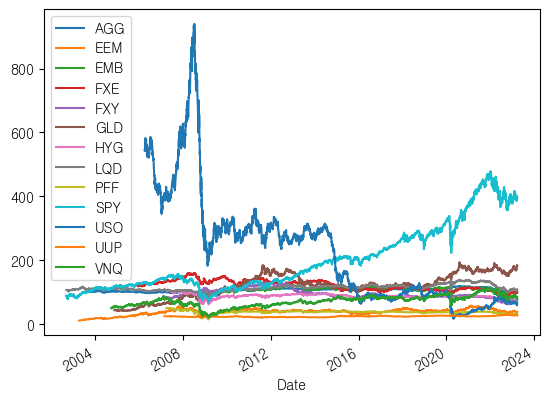

In [123]:
p.plot()

In [107]:
log_p = np.log(p); log_p.tail()

,삼성전자,SK하이닉스,삼성SDI,LG화학,NAVER,현대차,POSCO홀딩스,셀트리온
Date,,,,,,,,
2023-03-17,11.023535,11.338572,13.488394,13.461689,12.196022,12.081643,12.679196,11.960811
2023-03-20,11.005428,11.334994,13.480038,13.434250,12.213545,12.073113,12.672946,11.969717
2023-03-21,11.007087,11.333799,13.482831,13.425427,12.208570,12.077102,12.672946,11.957611
2023-03-22,11.020267,11.372513,13.503536,13.463112,12.240474,12.102377,12.706848,11.958252
2023-03-23,11.039717,11.390758,13.522481,13.475833,12.225875,12.103486,12.703813,11.947949


In [108]:
log_p_scaled = StandardScaler().fit_transform(log_p); log_p_scaled

array([[-0.93372947, -0.83228557, -1.5450645 , ...,  0.08492   ,
         1.56886905,  1.28561352],
       [-0.91808951, -0.81966252, -1.60050986, ...,  0.13168976,
         1.66307776,  1.39631727],
       [-0.91808951, -0.74460165, -1.61744919, ...,  0.13168976,
         1.78161442,  1.69989733],
       ...,
       [ 0.19679847, -0.44953887,  1.18385627, ...,  0.46072992,
         0.93921055, -1.12421578],
       [ 0.25773591, -0.260414  ,  1.22506601, ...,  0.5552977 ,
         1.10619668, -1.121527  ],
       [ 0.34766212, -0.17128741,  1.26277355, ...,  0.55944574,
         1.0912479 , -1.16475556]])

In [109]:
log_p_scaled.shape

(1252, 8)

In [110]:
# reducer = PCA(n_components=0.9, random_state=0)
reducer = FastICA(n_components=3, random_state=0)
comp = reducer.fit_transform(log_p_scaled); comp

array([[ 0.05099465,  0.01282873, -0.05584913],
       [ 0.05319098,  0.01266834, -0.05984493],
       [ 0.0539197 ,  0.0142243 , -0.06860298],
       ...,
       [ 0.02074879, -0.03252072,  0.02600792],
       [ 0.02282689, -0.03681113,  0.02477887],
       [ 0.02226045, -0.03824212,  0.02638043]])

In [111]:
comp.shape

(1252, 3)

In [95]:
reducer.explained_variance_ratio_

AttributeError: 'FastICA' object has no attribute 'explained_variance_ratio_'

In [96]:
reducer.singular_values_

AttributeError: 'FastICA' object has no attribute 'singular_values_'

In [112]:
reducer.components_.T

array([[-0.0037853 , -0.0044703 ,  0.0012942 ],
       [-0.00140542, -0.00511337,  0.00102723],
       [-0.00575172, -0.00497174,  0.00631638],
       [-0.00549847, -0.00207208, -0.00208808],
       [-0.00989485, -0.00028554, -0.00029803],
       [ 0.00409556, -0.00751204, -0.00076486],
       [ 0.02245966, -0.01157868, -0.00831346],
       [-0.00643   ,  0.01080155, -0.02533569]])

In [113]:
reducer.components_.shape

(3, 8)

In [114]:
log_p_scaled @ reducer.components_.T

array([[ 0.05099465,  0.01282873, -0.05584913],
       [ 0.05319098,  0.01266834, -0.05984493],
       [ 0.0539197 ,  0.0142243 , -0.06860298],
       ...,
       [ 0.02074879, -0.03252072,  0.02600792],
       [ 0.02282689, -0.03681113,  0.02477887],
       [ 0.02226045, -0.03824212,  0.02638043]])

<AxesSubplot:>

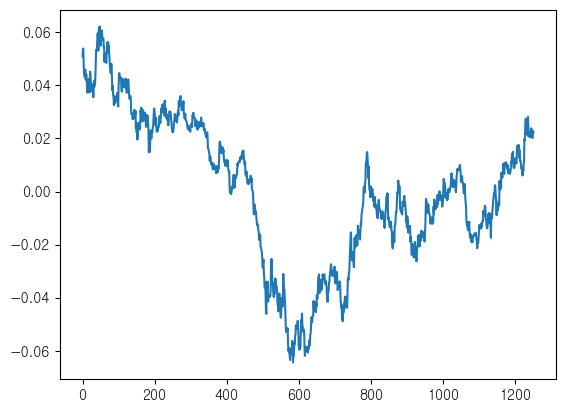

In [115]:
pd.Series(comp[:,0]).plot()

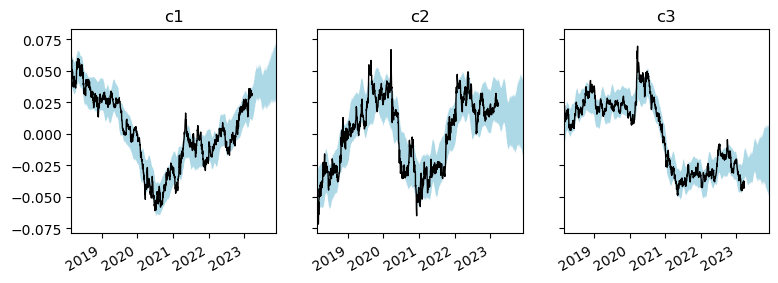

In [55]:
pricer.plot_comp_forecast()

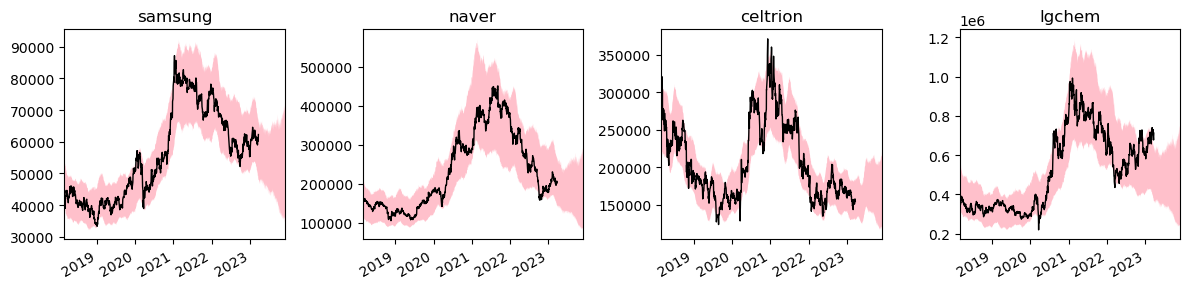

In [56]:
pricer.plot_p_forecast('samsung','naver','celtrion', 'lgchem')

C:\Users\USER\Documents\GitHub\pricey\pricey\api.py:180: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(['{:,.0%}'.format(x) for x in axes[0].get_xticks()]);
C:\Users\USER\Documents\GitHub\pricey\pricey\api.py:185: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(['{:,.0%}'.format(x) for x in axes[1].get_xticks()]);
C:\Users\USER\Documents\GitHub\pricey\pricey\api.py:191: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[2].set_xticklabels(['{:,.0%}'.format(x) for x in axes[2].get_xticks()]);
C:\Users\USER\Documents\GitHub\pricey\pricey\api.py:203: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[4].set_xticklabels(['{:,.0%}'.format(x) for x in axes[4].get_xticks()]);


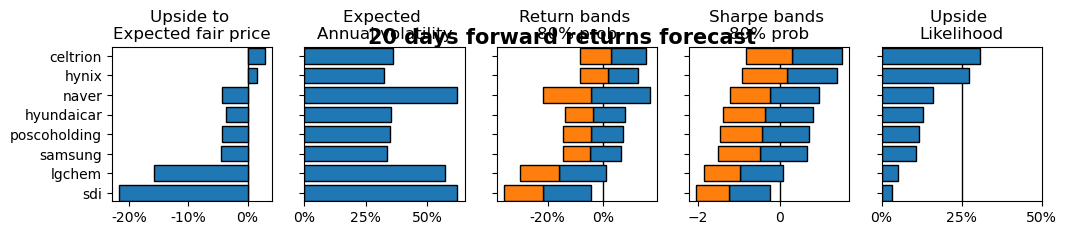

In [57]:
pricer.plot_stats(nfwd=20, up_thres=0.01, sortby='up_prob', excludes=[])

In [58]:
pricer.stats(nfwd=20, up_thres=0.01)

,rband_fair,rband_min,rband_max,std,shband_min,shband_fair,shband_max,up_prob
hynix,0.015931,-0.084694,0.127619,0.324035,-0.924096,0.173826,1.392449,0.542845
hyundaicar,-0.035698,-0.139107,0.080132,0.352403,-1.395612,-0.358148,0.803934,0.259036
poscoholding,-0.042489,-0.144230,0.071349,0.348993,-1.461152,-0.430438,0.722816,0.232595
samsung,-0.045544,-0.143768,0.063947,0.337384,-1.506579,-0.477268,0.670120,0.216069
sdi,-0.216455,-0.358057,-0.043617,0.619252,-2.044279,-1.235819,-0.249027,0.064350
naver,-0.042853,-0.215961,0.168475,0.619776,-1.231958,-0.244458,0.961073,0.323951
lgchem,-0.158300,-0.299566,0.011457,0.570768,-1.855613,-0.980565,0.070966,0.101226
celtrion,0.029164,-0.082992,0.155036,0.358464,-0.818546,0.287642,1.529123,0.615046
